In [ ]:
import os
import pandas as pd

## Load and Initial Data Exploration

## Load Fake dataset

In [4]:
fake_news_df = pd.read_csv("Fake.csv")

In [5]:
fake_news_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
fake_news_df.shape

(23481, 4)

In [7]:
fake_news_df.columns.tolist()

['title', 'text', 'subject', 'date']

In [8]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


## Load True Dataset

In [9]:
real_news_df = pd.read_csv("True.csv")

In [10]:
real_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
real_news_df.shape

(21417, 4)

In [12]:
real_news_df.columns.tolist()

['title', 'text', 'subject', 'date']

In [13]:
real_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## Combination of dataset

In [14]:

fake_news_df['label'] = 0
real_news_df['label'] = 1

news_df = pd.concat([fake_news_df, real_news_df], ignore_index=True)


In [15]:
news_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [16]:
news_df.shape

(44898, 5)

In [17]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


## Exploratory Data Analysis (EDA) Visualizations


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rejuwan\AppData\Local\Temp\ipykernel_15236\4164811264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=news_df, palette='viridis')


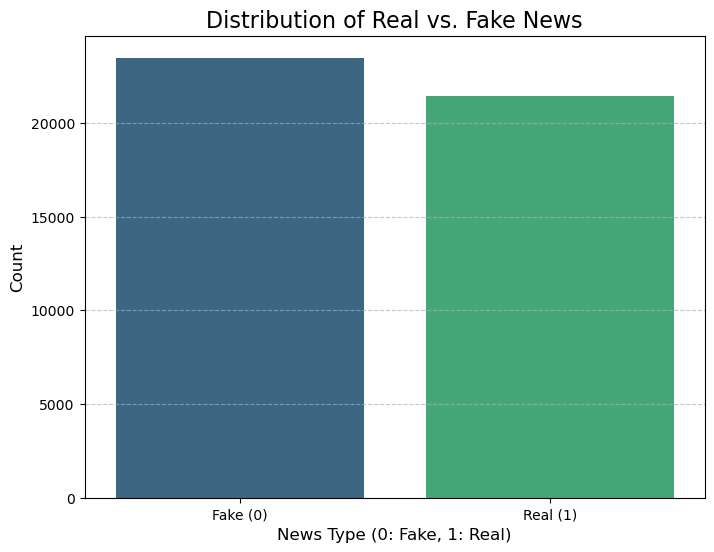

In [19]:
# Class Distribution Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=news_df, palette='viridis')
plt.title('Distribution of Real vs. Fake News', fontsize=16)
plt.xlabel('News Type (0: Fake, 1: Real)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Fake (0)', 'Real (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

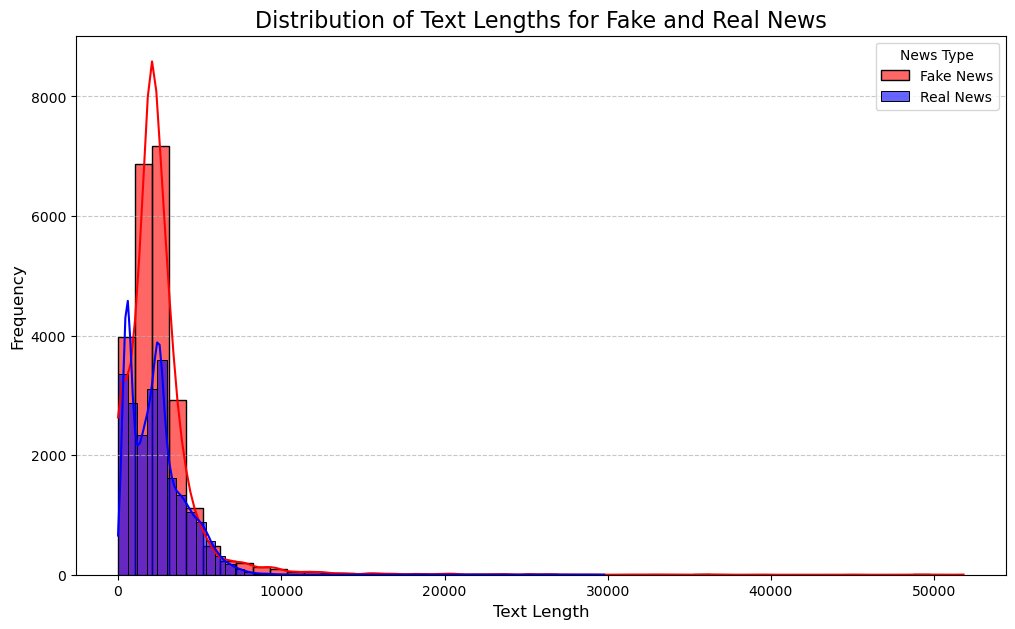

In [20]:
# Text Length Distribution Histogram
news_df['text_length'] = news_df['text'].apply(len)

plt.figure(figsize=(12, 7))
sns.histplot(news_df[news_df['label'] == 0]['text_length'], color='red', label='Fake News', kde=True, alpha=0.6, bins=50)
sns.histplot(news_df[news_df['label'] == 1]['text_length'], color='blue', label='Real News', kde=True, alpha=0.6, bins=50)
plt.title('Distribution of Text Lengths for Fake and Real News', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='News Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

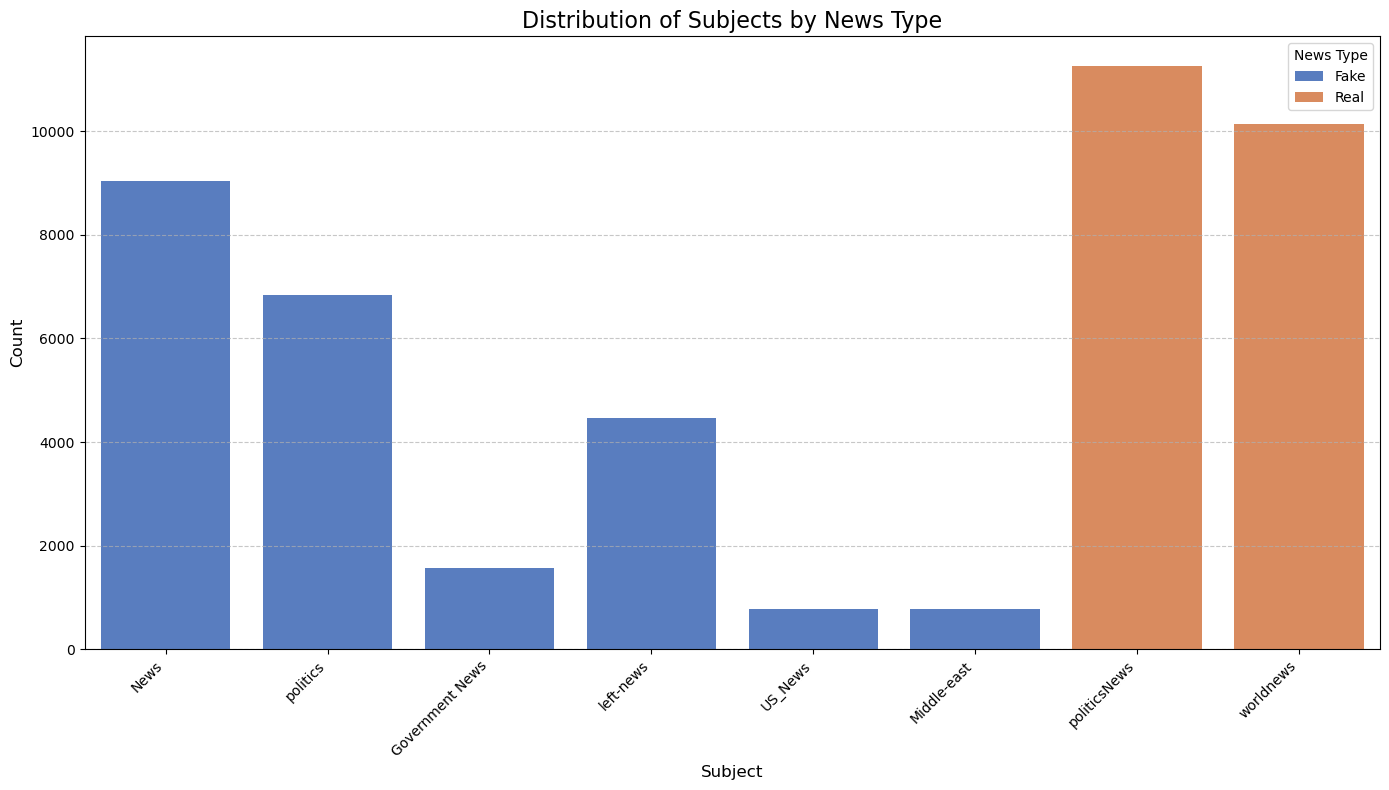

In [21]:

# Subject Distribution Count Plot
plt.figure(figsize=(14, 8))
sns.countplot(x='subject', hue='label', data=news_df, palette='muted')
plt.title('Distribution of Subjects by News Type', fontsize=16)
plt.xlabel('Subject', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='News Type', labels=['Fake', 'Real'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Text Data Preprocessing - Cleaning

In [23]:
import re
import string

# Create 'combined_text' column
news_df['combined_text'] = news_df['title'] + ' ' + news_df['text']

# Define a cleaning function
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with single space and strip
    return text

# Apply the cleaning function to 'combined_text'
news_df['cleaned_text'] = news_df['combined_text'].apply(clean_text)

# Display
print("---Text Before and After Cleaning ---")
for i in range(5):
    print(f"\nExample {i+1}:")
    print(f"Original combined_text: {news_df['combined_text'].iloc[i]}")
    print(f"Cleaned text:           {news_df['cleaned_text'].iloc[i]}")

print("Text data cleaning and preprocessing complete. New 'combined_text' and 'cleaned_text' columns created.")

---Text Before and After Cleaning ---

Example 1:
Original combined_text:  Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as y

## Text Data Preprocessing - Tokenization and Numericalization

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')

# Fix: Download 'punkt_tab' resource as per LookupError traceback
try:
    nltk.data.find('tokenizers/punkt_tab/english/')
except LookupError:
    nltk.download('punkt_tab')

# Tokenize the cleaned text
news_df['tokenized_text'] = news_df['cleaned_text'].apply(word_tokenize)

# Remove English stop words
stop_words = set(stopwords.words('english'))
news_df['tokenized_text'] = news_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

# Build vocabulary and assign integer IDs
all_words = [word for tokens in news_df['tokenized_text'] for word in tokens]
word_counts = Counter(all_words)
vocabulary = {"PAD": 0} # Reserve 0 for padding
for word, _ in word_counts.most_common():
    vocabulary[word] = len(vocabulary)

# Convert tokenized text into numerical sequences
news_df['numerical_sequences'] = news_df['tokenized_text'].apply(lambda x: [vocabulary[word] for word in x if word in vocabulary])

# Display examples of original, tokenized, and numericalized text
print("--- Examples of Text Preprocessing ---")
for i in range(5):
    print(f"\nExample {i+1}:")
    print(f"Original cleaned_text:  {news_df['cleaned_text'].iloc[i][:100]}...")
    print(f"Tokenized text:         {news_df['tokenized_text'].iloc[i][:20]}...") # Show first 20 tokens
    print(f"Numerical sequences:    {news_df['numerical_sequences'].iloc[i][:20]}...") # Show first 20 numerical IDs

# Calculate sequence lengths
news_df['sequence_length'] = news_df['numerical_sequences'].apply(len)

--- Examples of Text Preprocessing ---

Example 1:
Original cleaned_text:  donald trump sends out embarrassing new year’s eve message this is disturbing donald trump just coul...
Tokenized text:         ['donald', 'trump', 'sends', 'embarrassing', 'new', 'year', '’', 'eve', 'message', 'disturbing', 'donald', 'trump', 'wish', 'americans', 'happy', 'new', 'year', 'leave', 'instead', 'give']...
Numerical sequences:    [18, 1, 4660, 2526, 12, 39, 3, 4440, 503, 2623, 18, 1, 2272, 130, 1507, 12, 39, 525, 423, 277]...

Example 2:
Original cleaned_text:  drunk bragging trump staffer started russian collusion investigation house intelligence committee ch...
Tokenized text:         ['drunk', 'bragging', 'trump', 'staffer', 'started', 'russian', 'collusion', 'investigation', 'house', 'intelligence', 'committee', 'chairman', 'devin', 'nunes', 'going', 'bad', 'day', 'assumption', 'like', 'many']...
Numerical sequences:    [6495, 5411, 1, 3322, 764, 103, 1511, 166, 16, 167, 123, 472, 5616, 2799, 58,

In [26]:
mean_len = news_df['sequence_length'].mean()
print(f"Mean sequence length:    {mean_len:.2f}")

Mean sequence length:    240.98


In [27]:
median_len = news_df['sequence_length'].median()
print(f"Median sequence length:  {median_len:.2f}")

Median sequence length:  212.00


In [ ]:
percentile_75 = news_df['sequence_length'].quantile(0.75)
print(f"75th percentile:         {percentile_75:.2f}")


75th percentile:         298.00


In [30]:
percentile_90 = news_df['sequence_length'].quantile(0.90)
print(f"90th percentile:         {percentile_90:.2f}")

90th percentile:         442.00


In [31]:
# max_len
max_len = int(percentile_90) 
print(f"\nSuggested max_len for padding: {max_len} (based on 90th percentile to cover most sequences)")

print("Text tokenization, stop word removal, numericalization, and sequence length analysis complete.")



Suggested max_len for padding: 442 (based on 90th percentile to cover most sequences)
Text tokenization, stop word removal, numericalization, and sequence length analysis complete.


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# numerical sequences to max_len
X = pad_sequences(news_df['numerical_sequences'].tolist(), maxlen=max_len, padding='post', truncating='post')


print(f"Shape of padded sequences (X): {X.shape}")


print("\nFirst 50 elements of X[0]):")
print(X[0][:50])



Shape of padded sequences (X): (44898, 442)

First 50 elements of X[0]):
[   18     1  4660  2526    12    39     3  4440   503  2623    18     1
  2272   130  1507    12    39   525   423   277  8205  2954  8782  4538
   481    28    42    36   824   140  1096    10   341    40  4424  9361
  2690 10526    94  2272   816   213  2954  8782    38  4538   481    28
    42  1507]


In [34]:
# Prepare labels (y) for model training
y = news_df['label'].values

print(f"Shape of labels (y): {y.shape}")

print("Numerical sequences padded and features/labels prepared for model training.")

Shape of labels (y): (44898,)
Numerical sequences padded and features/labels prepared for model training.


## Text Data Preprocessing - Padding and Data Split

In [36]:
from sklearn.model_selection import train_test_split

# Split data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split temporary set into validation (20%) and test (20%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("--- Dataset Split Shapes ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"y_val shape:   {y_val.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")

print("Data split into training, validation, and test sets successfully.")

--- Dataset Split Shapes ---
X_train shape: (26938, 442)
y_train shape: (26938,)
X_val shape:   (8980, 442)
y_val shape:   (8980,)
X_test shape:  (8980, 442)
y_test shape:  (8980,)
Data split into training, validation, and test sets successfully.


## PyTorch Data Preparation


In [37]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float)
X_val_tensor = torch.tensor(X_val, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.float)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float)

# TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# batch size
batch_size = 64 

# Create DataLoader objects
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the lengths of the DataLoaders
print("--- PyTorch DataLoader Information ---")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")

print("PyTorch tensors and DataLoaders created successfully.")

--- PyTorch DataLoader Information ---
Number of training batches: 421
Number of validation batches: 141
Number of test batches: 141
PyTorch tensors and DataLoaders created successfully.


## Baseline PyTorch Model (TextCNN)

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Define TextCNN class
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, output_dim, dropout_rate=0.5):
        super().__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # Convolutional layers
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim,
                      out_channels=num_filters,
                      kernel_size=fs)
            for fs in filter_sizes
        ])

        # Dropout layer
        self.dropout = nn.Dropout(dropout_rate)

        # Fully connected output layer
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)

    def forward(self, text):
        # text = [batch size, seq len]

        embedded = self.embedding(text)
        # embedded = [batch size, seq len, embedding dim]

        # Permute dimensions for Conv1d: [batch size, embedding dim, seq len]
        embedded = embedded.permute(0, 2, 1)

        conved = [F.relu(conv(embedded)) for conv in self.convs]
        # conved_n = [batch size, num filters, (seq len - filter_sizes[n] + 1)]

        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        # pooled_n = [batch size, num filters]

        cat = self.dropout(torch.cat(pooled, dim=1))
        # cat = [batch size, num filters * len(filter_sizes)]

        return self.fc(cat)

# Model parameters
vocab_size = len(vocabulary) # From previous step
embedding_dim = 100
num_filters = 100
filter_sizes = [3, 4, 5]
output_dim = 1 # For binary classification (real/fake)

# Instantiate the TextCNN model
model = TextCNN(vocab_size, embedding_dim, num_filters, filter_sizes, output_dim)

# loss function
criterion = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Specify the device for training (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

# Print the model architecture and confirm the device
print(model)
print(f"\nModel will be trained on: {device}")

print("TextCNN model, criterion, and optimizer initialized. Model moved to device.")

TextCNN(
  (embedding): Embedding(203594, 100)
  (convs): ModuleList(
    (0): Conv1d(100, 100, kernel_size=(3,), stride=(1,))
    (1): Conv1d(100, 100, kernel_size=(4,), stride=(1,))
    (2): Conv1d(100, 100, kernel_size=(5,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=300, out_features=1, bias=True)
)

Model will be trained on: cpu
TextCNN model, criterion, and optimizer initialized. Model moved to device.


## Train and Evaluate Baseline Model

In [40]:
def binary_accuracy(preds, y):
    # Round predictions to the closest integer (0 or 1)
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() # Convert to float for division
    acc = correct.sum() / len(correct)
    return acc

# Train function
def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train() # Set the model to training mode

    for batch in iterator:
        text, labels = batch
        
        text, labels = text.to(device), labels.to(device)

        optimizer.zero_grad() # Zero the gradients

        predictions = model(text).squeeze(1) # Squeeze the output to match labels shape

        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)

        loss.backward() # Backpropagation
        optimizer.step() # Update weights

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Evaluate function
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval() # Set the model to evaluation mode

    with torch.no_grad(): # Disable gradient calculations
        for batch in iterator:
            text, labels = batch
           
            text, labels = text.to(device), labels.to(device)

            predictions = model(text).squeeze(1)

            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# lists to store metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

N_EPOCHS = 3

print(f"Starting training for {N_EPOCHS} epochs...")

# Implement the main training loop
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, val_loader, criterion, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Metrics after each epoch
    print(f'Epoch: {epoch+1:02}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')

print("Training complete.")

Starting training for 3 epochs...
Epoch: 01
	Train Loss: 0.119 | Train Acc: 94.84%
	 Val. Loss: 0.019 |  Val. Acc: 99.50%
Epoch: 02
	Train Loss: 0.025 | Train Acc: 99.34%
	 Val. Loss: 0.014 |  Val. Acc: 99.62%
Epoch: 03
	Train Loss: 0.015 | Train Acc: 99.60%
	 Val. Loss: 0.011 |  Val. Acc: 99.72%
Training complete.


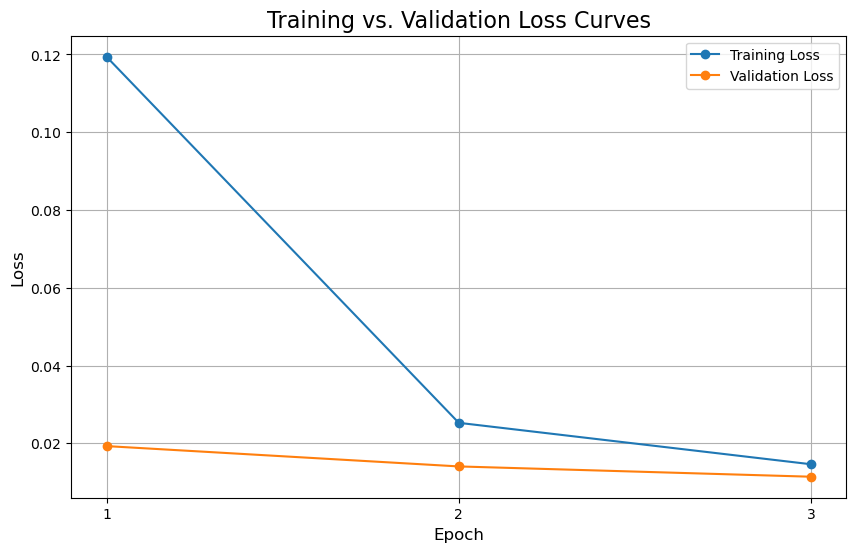

In [41]:
# Training vs. Validation Loss Curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, N_EPOCHS + 1), train_losses, label='Training Loss', marker='o')
plt.plot(range(1, N_EPOCHS + 1), val_losses, label='Validation Loss', marker='o')
plt.title('Training vs. Validation Loss Curves', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(range(1, N_EPOCHS + 1))
plt.show()


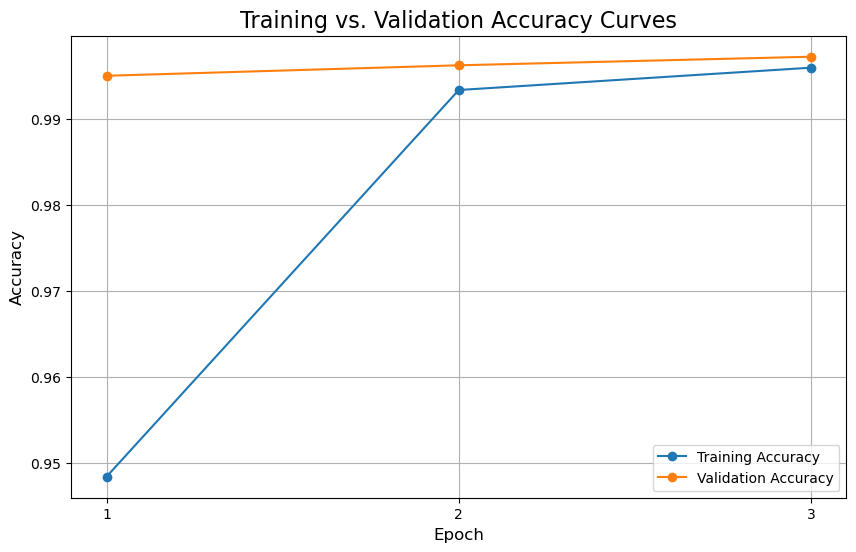

In [42]:
# Training vs. Validation Accuracy Curves
plt.figure(figsize=(10, 6))
plt.plot(range(1, N_EPOCHS + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, N_EPOCHS + 1), val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training vs. Validation Accuracy Curves', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(range(1, N_EPOCHS + 1))
plt.show()

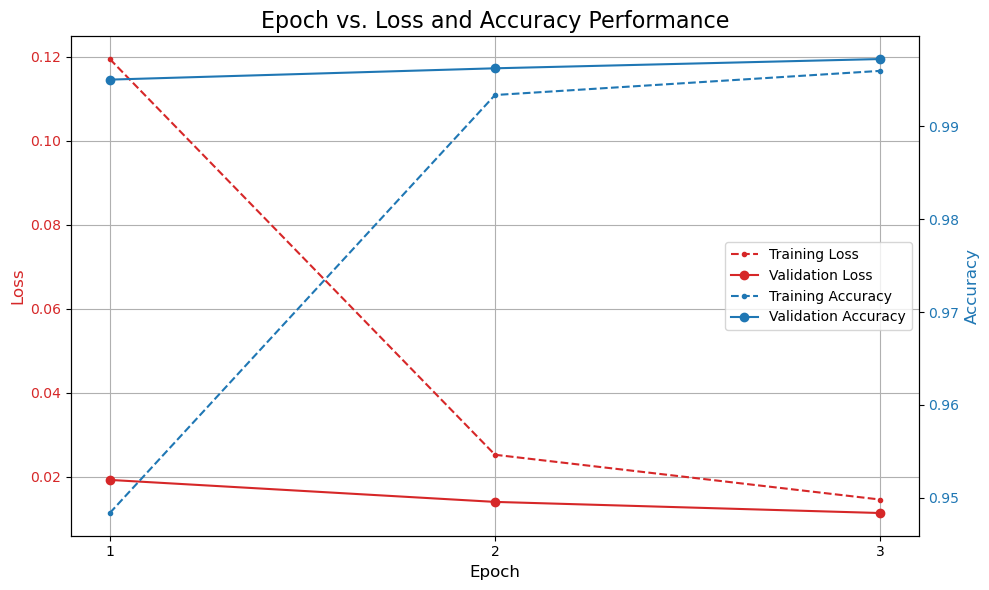

In [45]:

# 'Epoch vs. Performance'
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', color=color, fontsize=12)
ax1.plot(range(1, N_EPOCHS + 1), train_losses, color=color, linestyle='--', label='Training Loss', marker='.')
ax1.plot(range(1, N_EPOCHS + 1), val_losses, color=color, label='Validation Loss', marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color, fontsize=12)  # we already handled the x-label with ax1
ax2.plot(range(1, N_EPOCHS + 1), train_accuracies, color=color, linestyle='--', label='Training Accuracy', marker='.')
ax2.plot(range(1, N_EPOCHS + 1), val_accuracies, color=color, label='Validation Accuracy', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', fontsize=10)

plt.title('Epoch vs. Loss and Accuracy Performance', fontsize=16)
plt.xticks(range(1, N_EPOCHS + 1))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



## Hyperparameter Tuning 

In [46]:
# Reuse the TextCNN model definition from the previous step
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, output_dim, dropout_rate=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim,
                      out_channels=num_filters,
                      kernel_size=fs)
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)

# Reuse binary_accuracy, train, and evaluate functions from the previous step
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for batch in iterator:
        text, labels = batch
        text, labels = text.to(device), labels.to(device)
        optimizer.zero_grad()
        predictions = model(text).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            text, labels = batch
            text, labels = text.to(device), labels.to(device)
            predictions = model(text).squeeze(1)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Values for the hyperparameters tunning
learning_rates = [0.001, 0.0005, 0.0001]
batch_sizes = [32, 64, 128]
num_filters_options = [50, 100, 150]

# Fixed model parameters from previous step
vocab_size = len(vocabulary)
embedding_dim = 100
filter_sizes = [3, 4, 5]
output_dim = 1
dropout_rate = 0.5
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize an empty list to store tuning results
tuning_results = []

# Implement nested loops to iterate through all combinations
print("Starting Hyperparameter Tuning...")
tuning_epochs = 2 
# Limited epochs for tuning efficiency

for lr in learning_rates:
    for bs in batch_sizes:
        # Re-create DataLoaders for each batch_size
        current_train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
        current_val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)

        for nf in num_filters_options:
            # Hyperparameter combination
            print(f"\nTesting LR: {lr}, Batch Size: {bs}, Num Filters: {nf}")

            # Re-instantiate the TextCNN model
            current_model = TextCNN(vocab_size, embedding_dim, nf, filter_sizes, output_dim, dropout_rate)

            # Model moved to the device
            current_model = current_model.to(device)

            # Re-define the Adam optimizer
            current_optimizer = optim.Adam(current_model.parameters(), lr=lr)

            # criterion again just in case, though it's global and doesn't change
            criterion = nn.BCEWithLogitsLoss()
            criterion = criterion.to(device)

            # Train and evaluate the model for tuning_epochs
            best_val_acc_for_trial = 0
            for epoch in range(tuning_epochs):
                train_loss, train_acc = train(current_model, current_train_loader, current_optimizer, criterion, device)
                val_loss, val_acc = evaluate(current_model, current_val_loader, criterion, device)
                print(f"  Epoch {epoch+1}/{tuning_epochs} - Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
                if val_acc > best_val_acc_for_trial:
                    best_val_acc_for_trial = val_acc

            # Store tuning results
            tuning_results.append({
                'learning_rate': lr,
                'batch_size': bs,
                'num_filters': nf,
                'validation_accuracy': best_val_acc_for_trial
            })

print("Hyperparameter Tuning Complete.")

# Convert tuning_results to a pandas DataFrame
tuning_df = pd.DataFrame(tuning_results)
print("\n--- Tuning Results DataFrame ---")
print(tuning_df)

Starting Hyperparameter Tuning...

Testing LR: 0.001, Batch Size: 32, Num Filters: 50
  Epoch 1/2 - Val Loss: 0.0193, Val Acc: 0.9947
  Epoch 2/2 - Val Loss: 0.0119, Val Acc: 0.9963

Testing LR: 0.001, Batch Size: 32, Num Filters: 100
  Epoch 1/2 - Val Loss: 0.0134, Val Acc: 0.9960
  Epoch 2/2 - Val Loss: 0.0095, Val Acc: 0.9972

Testing LR: 0.001, Batch Size: 32, Num Filters: 150
  Epoch 1/2 - Val Loss: 0.0144, Val Acc: 0.9962
  Epoch 2/2 - Val Loss: 0.0073, Val Acc: 0.9984

Testing LR: 0.001, Batch Size: 64, Num Filters: 50
  Epoch 1/2 - Val Loss: 0.0184, Val Acc: 0.9952
  Epoch 2/2 - Val Loss: 0.0161, Val Acc: 0.9957

Testing LR: 0.001, Batch Size: 64, Num Filters: 100
  Epoch 1/2 - Val Loss: 0.0156, Val Acc: 0.9951
  Epoch 2/2 - Val Loss: 0.0084, Val Acc: 0.9976

Testing LR: 0.001, Batch Size: 64, Num Filters: 150
  Epoch 1/2 - Val Loss: 0.0118, Val Acc: 0.9962
  Epoch 2/2 - Val Loss: 0.0073, Val Acc: 0.9979

Testing LR: 0.001, Batch Size: 128, Num Filters: 50
  Epoch 1/2 - Val Los

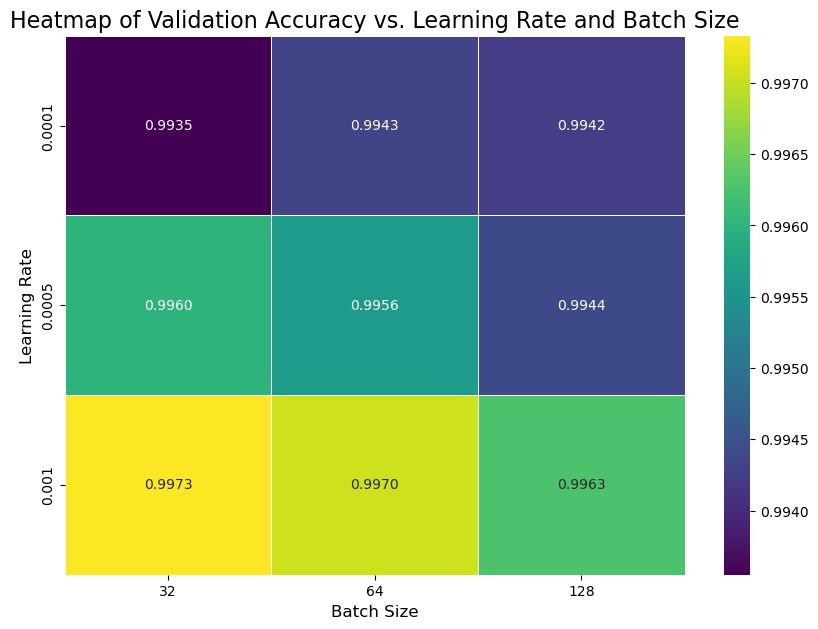

In [47]:
# Heatmap
pivot_table = tuning_df.pivot_table(index='learning_rate', columns='batch_size', values='validation_accuracy')

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="viridis", linewidths=.5)
plt.title('Heatmap of Validation Accuracy vs. Learning Rate and Batch Size', fontsize=16)
plt.xlabel('Batch Size', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.show()


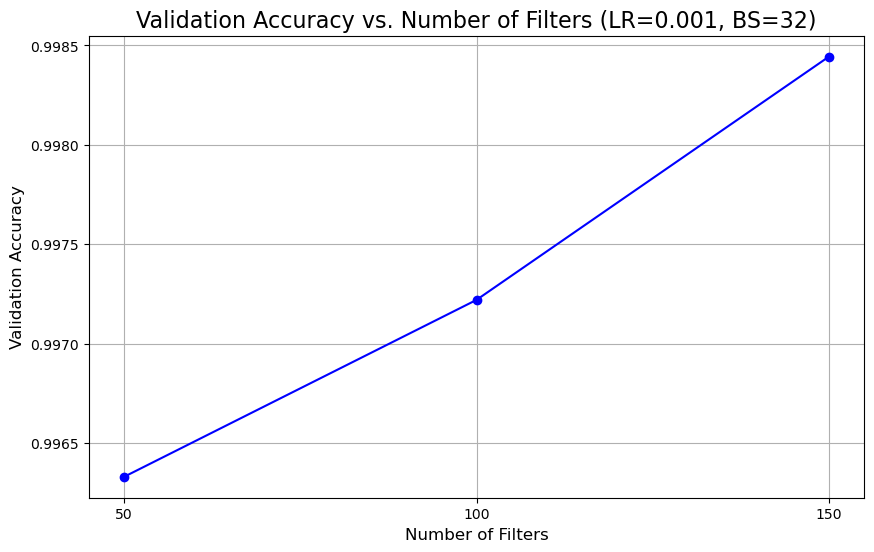

In [48]:
best_config = tuning_df.loc[tuning_df['validation_accuracy'].idxmax()]

representative_lr = learning_rates[0]
representative_bs = batch_sizes[0]

filtered_num_filters_df = tuning_df[
    (tuning_df['learning_rate'] == representative_lr) &
    (tuning_df['batch_size'] == representative_bs)
].sort_values(by='num_filters')

# Validation Accuracy vs. Number of Filters
if not filtered_num_filters_df.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_num_filters_df['num_filters'], filtered_num_filters_df['validation_accuracy'],
             marker='o', linestyle='-', color='blue')
    plt.title(f'Validation Accuracy vs. Number of Filters (LR={representative_lr}, BS={representative_bs})', fontsize=16)
    plt.xlabel('Number of Filters', fontsize=12)
    plt.ylabel('Validation Accuracy', fontsize=12)
    plt.xticks(num_filters_options)
    plt.grid(True)
    plt.show()
else:
    print("Could not generate num_filters plot as filtered data is empty.")

In [49]:
# Best hyperparameter combination
best_combination = tuning_df.loc[tuning_df['validation_accuracy'].idxmax()]
print("\n--- Best Hyperparameter Combination ---")
print(best_combination)



--- Best Hyperparameter Combination ---
learning_rate            0.001000
batch_size              32.000000
num_filters            150.000000
validation_accuracy      0.998443
Name: 2, dtype: float64


## Implement and Train Comparison Models

In [50]:
# Reuse binary_accuracy, train, and evaluate functions
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for batch in iterator:
        text, labels = batch
        text, labels = text.to(device), labels.to(device)
        optimizer.zero_grad()
        predictions = model(text).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            text, labels = batch
            text, labels = text.to(device), labels.to(device)
            predictions = model(text).squeeze(1)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# Global parameters 
vocab_size = len(vocabulary)
embedding_dim = 100
output_dim = 1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
N_EPOCHS = 3 

# To store best validation accuracies
comparison_model_accuracies = {}

print("--- Implementing and Training Comparison Models ---")

# Train a Simple LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
     
        embedded = self.dropout(self.embedding(text))
     
        output, (hidden, cell) = self.lstm(embedded)
        
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

       
        return self.fc(hidden)

# Hyperparameters for LSTM
hidden_dim = 256
n_layers = 2
dropout = 0.5
lr_lstm = 0.001

# Simple LSTM Model
simple_lstm_model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional=False, dropout=dropout)
simple_lstm_model = simple_lstm_model.to(device)

# Optimizer and Criterion
simple_lstm_optimizer = optim.Adam(simple_lstm_model.parameters(), lr=lr_lstm)
simple_lstm_criterion = nn.BCEWithLogitsLoss()
simple_lstm_criterion = simple_lstm_criterion.to(device)

print("\n--- Training Simple LSTM Model ---")
best_simple_lstm_acc = 0
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(simple_lstm_model, train_loader, simple_lstm_optimizer, simple_lstm_criterion, device)
    val_loss, val_acc = evaluate(simple_lstm_model, val_loader, simple_lstm_criterion, device)
    print(f'Epoch: {epoch+1:02} | Train Acc: {train_acc*100:.2f}% | Val. Acc: {val_acc*100:.2f}%')
    if val_acc > best_simple_lstm_acc:
        best_simple_lstm_acc = val_acc
comparison_model_accuracies['Simple LSTM'] = best_simple_lstm_acc

# Train a Bi-directional LSTM Model 

bilstm_model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional=True, dropout=dropout)
bilstm_model = bilstm_model.to(device)

bilstm_optimizer = optim.Adam(bilstm_model.parameters(), lr=lr_lstm)
bilstm_criterion = nn.BCEWithLogitsLoss()
bilstm_criterion = bilstm_criterion.to(device)

print("\n--- Training Bi-directional LSTM Model ---")
best_bilstm_acc = 0
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(bilstm_model, train_loader, bilstm_optimizer, bilstm_criterion, device)
    val_loss, val_acc = evaluate(bilstm_model, val_loader, bilstm_criterion, device)
    print(f'Epoch: {epoch+1:02} | Train Acc: {train_acc*100:.2f}% | Val. Acc: {val_acc*100:.2f}%')
    if val_acc > best_bilstm_acc:
        best_bilstm_acc = val_acc
comparison_model_accuracies['Bi-LSTM'] = best_bilstm_acc

# Train a GRU Model
class GRUModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, hidden = self.gru(embedded)

        if self.gru.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])

        return self.fc(hidden)

# Instantiate GRU Model (bidirectional 
gru_model = GRUModel(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional=True, dropout=dropout)
gru_model = gru_model.to(device)

gru_optimizer = optim.Adam(gru_model.parameters(), lr=lr_lstm)
gru_criterion = nn.BCEWithLogitsLoss()
gru_criterion = gru_criterion.to(device)

print("\n--- Training GRU Model ---")
best_gru_acc = 0
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(gru_model, train_loader, gru_optimizer, gru_criterion, device)
    val_loss, val_acc = evaluate(gru_model, val_loader, gru_criterion, device)
    print(f'Epoch: {epoch+1:02} | Train Acc: {train_acc*100:.2f}% | Val. Acc: {val_acc*100:.2f}%')
    if val_acc > best_gru_acc:
        best_gru_acc = val_acc
comparison_model_accuracies['GRU'] = best_gru_acc

# Train an Alternative TextCNN Model ---

class AlternativeTextCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_filters, filter_sizes, output_dim, dropout_rate=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim,
                      out_channels=num_filters,
                      kernel_size=fs)
            for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.permute(0, 2, 1)
        conved = [F.relu(conv(embedded)) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)

# Hyperparameters for Alternative TextCNN
alt_num_filters = 128
alt_filter_sizes = [2, 3, 4]

alt_textcnn_model = AlternativeTextCNN(vocab_size, embedding_dim, alt_num_filters, alt_filter_sizes, output_dim, dropout_rate)
alt_textcnn_model = alt_textcnn_model.to(device)

alt_textcnn_optimizer = optim.Adam(alt_textcnn_model.parameters(), lr=lr_lstm)
alt_textcnn_criterion = nn.BCEWithLogitsLoss()
alt_textcnn_criterion = alt_textcnn_criterion.to(device)

print("\n--- Training Alternative TextCNN Model ---")
best_alt_textcnn_acc = 0
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(alt_textcnn_model, train_loader, alt_textcnn_optimizer, alt_textcnn_criterion, device)
    val_loss, val_acc = evaluate(alt_textcnn_model, val_loader, alt_textcnn_criterion, device)
    print(f'Epoch: {epoch+1:02} | Train Acc: {train_acc*100:.2f}% | Val. Acc: {val_acc*100:.2f}%')
    if val_acc > best_alt_textcnn_acc:
        best_alt_textcnn_acc = val_acc
comparison_model_accuracies['Alternative TextCNN'] = best_alt_textcnn_acc

# --- 5. Define and Train an Averaged Word Embeddings + Feedforward Network ---
class AvgEmbeddingsFFN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim_ffn, output_dim, dropout_rate=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim_ffn)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_dim_ffn, output_dim)

    def forward(self, text):
        # text = [batch size, seq len]
        embedded = self.embedding(text)
        # embedded = [batch size, seq len, embedding dim]

        # Calculate average embeddings per sequence
        # Ignore padding (0s) when calculating mean if needed, but for simplicity, we average all
        averaged = embedded.mean(dim=1) # Average along the sequence length dimension
        # averaged = [batch size, embedding dim]

        x = self.dropout(self.relu(self.fc1(averaged)))
        return self.fc2(x)

# Hyperparameters for AvgEmbeddingsFFN
hidden_dim_ffn = 128

avg_ffn_model = AvgEmbeddingsFFN(vocab_size, embedding_dim, hidden_dim_ffn, output_dim, dropout_rate)
avg_ffn_model = avg_ffn_model.to(device)

avg_ffn_optimizer = optim.Adam(avg_ffn_model.parameters(), lr=lr_lstm)
avg_ffn_criterion = nn.BCEWithLogitsLoss()
avg_ffn_criterion = avg_ffn_criterion.to(device)

print("\n--- Training Averaged Word Embeddings + FFN Model ---")
best_avg_ffn_acc = 0
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(avg_ffn_model, train_loader, avg_ffn_optimizer, avg_ffn_criterion, device)
    val_loss, val_acc = evaluate(avg_ffn_model, val_loader, avg_ffn_criterion, device)
    print(f'Epoch: {epoch+1:02} | Train Acc: {train_acc*100:.2f}% | Val. Acc: {val_acc*100:.2f}%')
    if val_acc > best_avg_ffn_acc:
        best_avg_ffn_acc = val_acc
comparison_model_accuracies['Avg Embeddings + FFN'] = best_avg_ffn_acc

print("\n--- Comparison Model Training Complete ---")
print("Best Validation Accuracies:")
for model_name, accuracy in comparison_model_accuracies.items():
    print(f"  {model_name}: {accuracy*100:.2f}%")


--- Implementing and Training Comparison Models ---

--- Training Simple LSTM Model ---
Epoch: 01 | Train Acc: 53.43% | Val. Acc: 54.32%
Epoch: 02 | Train Acc: 55.23% | Val. Acc: 56.37%
Epoch: 03 | Train Acc: 55.44% | Val. Acc: 55.25%

--- Training Bi-directional LSTM Model ---
Epoch: 01 | Train Acc: 96.87% | Val. Acc: 99.88%
Epoch: 02 | Train Acc: 99.68% | Val. Acc: 99.84%
Epoch: 03 | Train Acc: 99.75% | Val. Acc: 99.88%

--- Training GRU Model ---
Epoch: 01 | Train Acc: 97.29% | Val. Acc: 99.86%
Epoch: 02 | Train Acc: 99.68% | Val. Acc: 99.86%
Epoch: 03 | Train Acc: 99.72% | Val. Acc: 99.89%

--- Training Alternative TextCNN Model ---
Epoch: 01 | Train Acc: 94.31% | Val. Acc: 99.56%
Epoch: 02 | Train Acc: 99.38% | Val. Acc: 99.86%
Epoch: 03 | Train Acc: 99.57% | Val. Acc: 99.82%

--- Training Averaged Word Embeddings + FFN Model ---
Epoch: 01 | Train Acc: 82.97% | Val. Acc: 92.76%
Epoch: 02 | Train Acc: 97.29% | Val. Acc: 98.67%
Epoch: 03 | Train Acc: 98.77% | Val. Acc: 98.81%

--- C

## Comparative Analysis and Visualization




In [51]:

model.eval()

baseline_test_loss, baseline_test_acc = evaluate(model, test_loader, criterion, device)

comparison_model_accuracies['Baseline TextCNN'] = baseline_test_acc


performance_df = pd.DataFrame(list(comparison_model_accuracies.items()), columns=['Model', 'Accuracy'])
performance_df = performance_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("--- Model Performance on Test/Validation Set ---")
print(performance_df)

--- Model Performance on Test/Validation Set ---
                  Model  Accuracy
0                   GRU  0.998892
1               Bi-LSTM  0.998781
2   Alternative TextCNN  0.998559
3      Baseline TextCNN  0.996454
4  Avg Embeddings + FFN  0.988143
5           Simple LSTM  0.563675


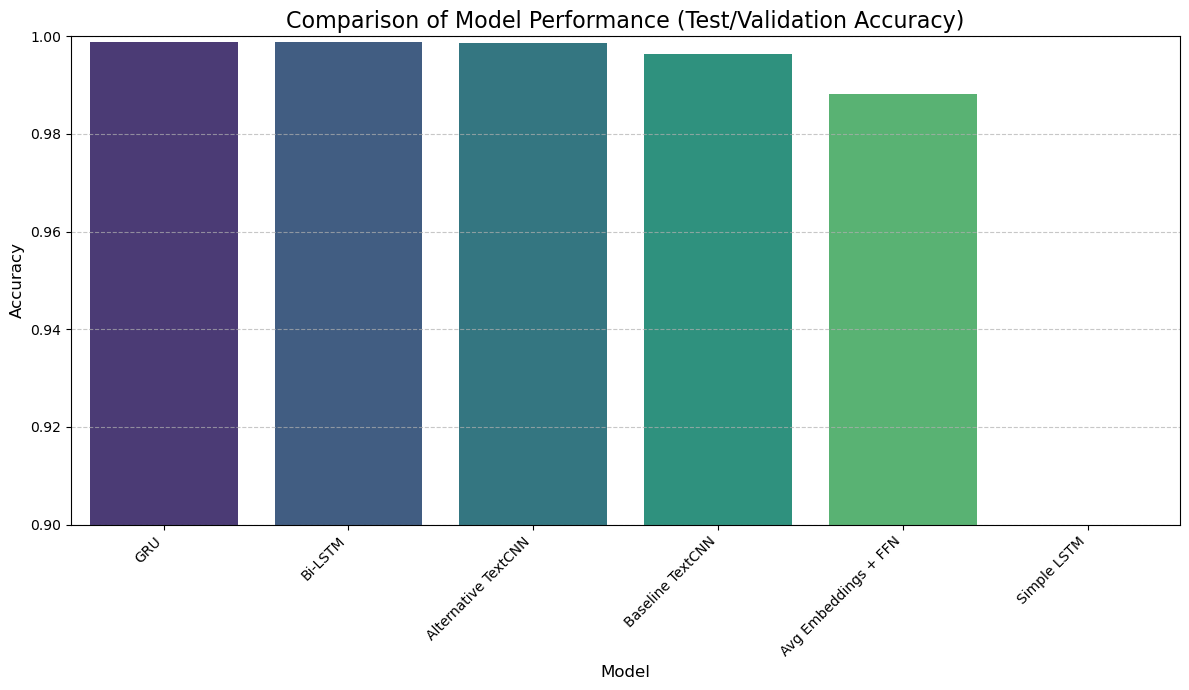

Evaluation on test set for baseline model complete, and comparison graph generated.


In [52]:
# Bar chart to visualize the performance of all models
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Accuracy', hue='Model', data=performance_df, palette='viridis', legend=False)
plt.title('Comparison of Model Performance (Test/Validation Accuracy)', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.9, 1.0) # Set y-axis limit for better visibility of high accuracies
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Evaluation on test set for baseline model complete, and comparison graph generated.")

## Detailed Evaluation of Best Model



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Identify the best performing model (Bi-LSTM) and ensure it's in evaluation mode
best_model = bilstm_model # bilstm_model was identified as best from previous step's performance_df
best_model.eval()

# Prepare lists to store predictions and true labels
all_preds = []
all_labels = []

# Obtain predictions from the best model on the test_loader
with torch.no_grad():
    for text, labels in test_loader:
        text = text.to(device)
        predictions = best_model(text).squeeze(1)

        # Move predictions and labels to CPU and convert to NumPy arrays
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)


probabilities = torch.sigmoid(torch.tensor(all_preds)).numpy()
binary_preds = (probabilities >= 0.5).astype(int)

In [54]:
print("--- Detailed Evaluation of Best Model (Bi-LSTM) ---")

# Calculate and print key classification metrics
acc = accuracy_score(all_labels, binary_preds)
prec = precision_score(all_labels, binary_preds)
rec = recall_score(all_labels, binary_preds)
f1 = f1_score(all_labels, binary_preds)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")

--- Detailed Evaluation of Best Model (Bi-LSTM) ---
Accuracy:  0.9984
Precision: 0.9993
Recall:    0.9974
F1-Score:  0.9984


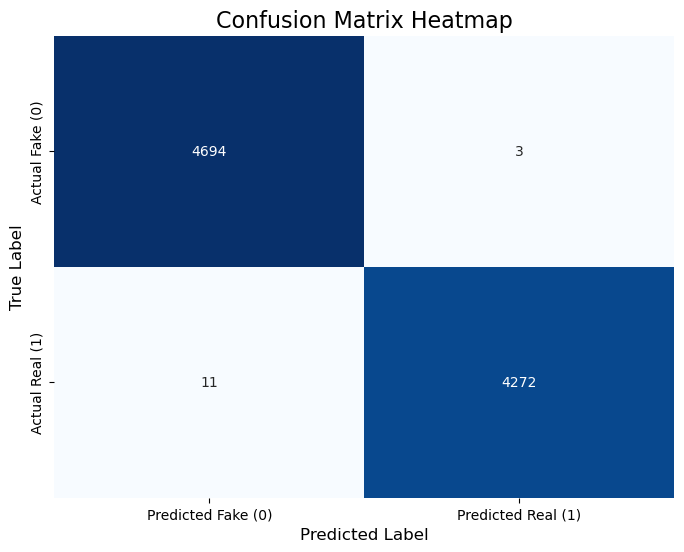

In [55]:
# Generate a Confusion Matrix Heatmap
cm = confusion_matrix(all_labels, binary_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Fake (0)', 'Predicted Real (1)'],
            yticklabels=['Actual Fake (0)', 'Actual Real (1)'])
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

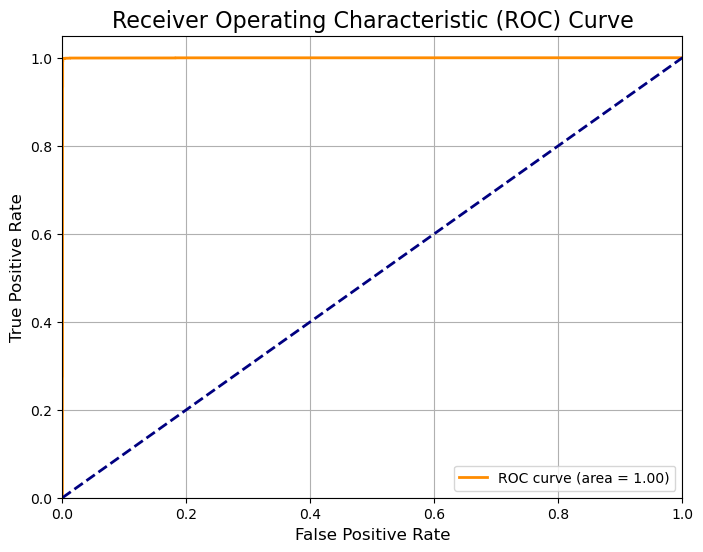

In [56]:
# Generate an ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, probabilities)
roc_auc = roc_auc_score(all_labels, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

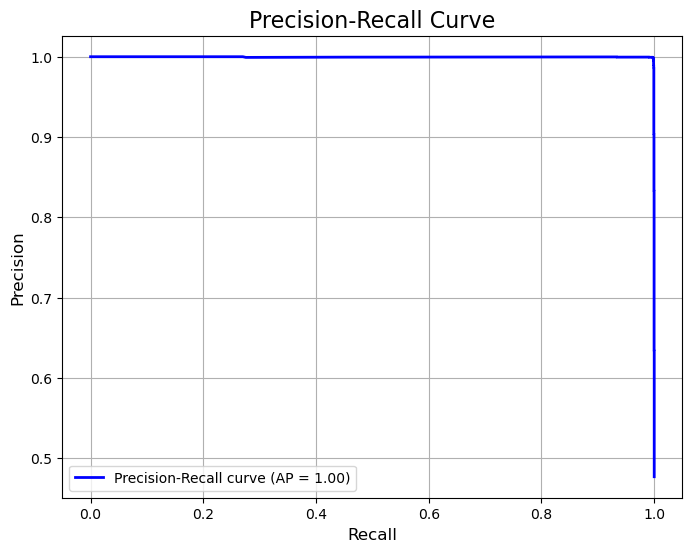

Detailed evaluation and plots generated for the best performing model.


In [57]:
# Generate a Precision-Recall Curve
precision, recall, _ = precision_recall_curve(all_labels, probabilities)
avg_precision = average_precision_score(all_labels, probabilities)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.grid(True)
plt.show()

print("Detailed evaluation and plots generated for the best performing model.")

## Error Analysis and Visualization

In [58]:
from sklearn.model_selection import train_test_split
import numpy as np

# Get original indices
indices = np.arange(len(X))

# Split data and indices into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp, idx_train, idx_temp = train_test_split(
    X, y, indices, test_size=0.4, random_state=42, stratify=y
)

# Split temporary set into validation (20%) and test (20%) sets
X_val, X_test, y_val, y_test, idx_val, idx_test = train_test_split(
    X_temp, y_temp, idx_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("--- Dataset Split Shapes ---")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"idx_train shape: {idx_train.shape}")
print(f"X_val shape:   {X_val.shape}")
print(f"y_val shape:   {y_val.shape}")
print(f"idx_val shape: {idx_val.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")
print(f"idx_test shape: {idx_test.shape}")

print("Data split into training, validation, and test sets with original indices successfully.")

--- Dataset Split Shapes ---
X_train shape: (26938, 442)
y_train shape: (26938,)
idx_train shape: (26938,)
X_val shape:   (8980, 442)
y_val shape:   (8980,)
idx_val shape: (8980,)
X_test shape:  (8980, 442)
y_test shape:  (8980,)
idx_test shape: (8980,)
Data split into training, validation, and test sets with original indices successfully.


In [59]:
# Convert 'all_labels' and 'binary_preds' into a Pandas DataFrame
error_analysis_df = pd.DataFrame({
    'original_index': idx_test,
    'actual_label': all_labels,
    'predicted_label': binary_preds
})

# 2. Add 'cleaned_text' and 'text_length' columns from news_df
error_analysis_df = error_analysis_df.merge(
    news_df[['cleaned_text', 'text_length']],
    left_on='original_index',
    right_index=True,
    how='left'
)

# Identify false positives and false negatives
false_positives = error_analysis_df[(error_analysis_df['actual_label'] == 0) & (error_analysis_df['predicted_label'] == 1)]
false_negatives = error_analysis_df[(error_analysis_df['actual_label'] == 1) & (error_analysis_df['predicted_label'] == 0)]

print("--- Error Analysis Results ---")
print(f"Number of False Positives: {len(false_positives)}")
print(f"Number of False Negatives: {len(false_negatives)}")

--- Error Analysis Results ---
Number of False Positives: 3
Number of False Negatives: 11


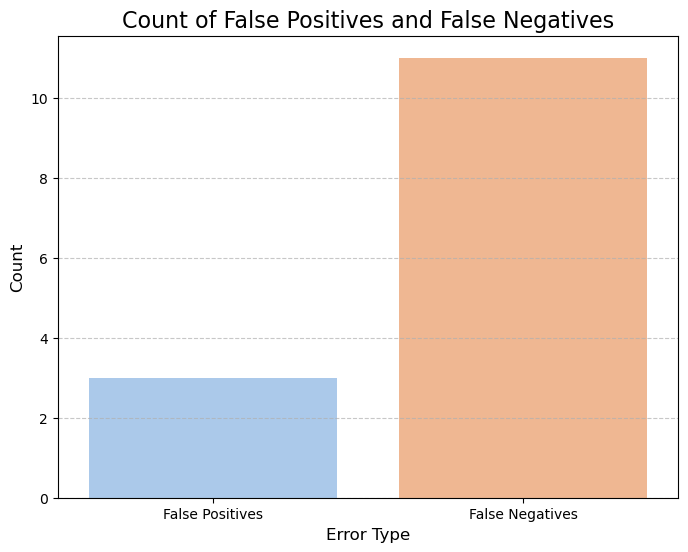

In [60]:
# Calculate the count of false positives and false negatives
error_counts = pd.DataFrame({
    'Error Type': ['False Positives', 'False Negatives'],
    'Count': [len(false_positives), len(false_negatives)]
})

# False Positives vs. False Negatives
plt.figure(figsize=(8, 6))
sns.barplot(x='Error Type', y='Count', hue='Error Type', data=error_counts, palette='pastel', legend=False)
plt.title('Count of False Positives and False Negatives', fontsize=16)
plt.xlabel('Error Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

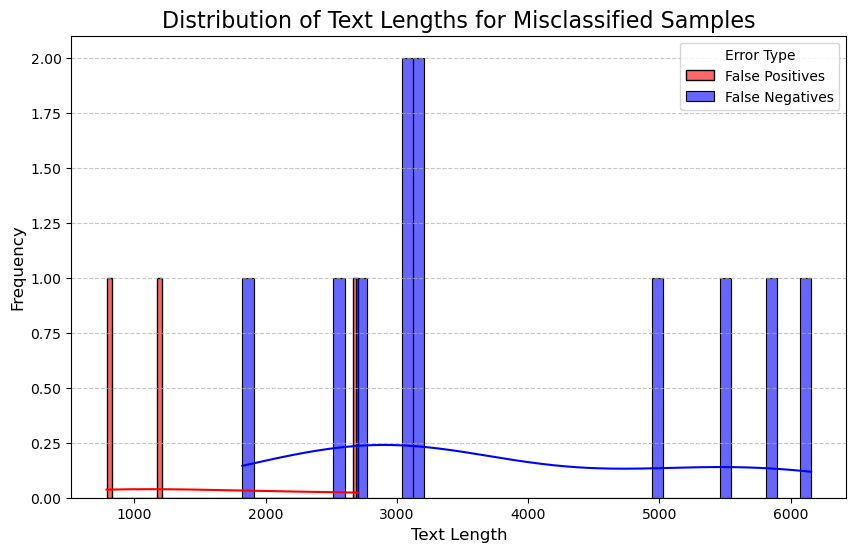

In [61]:
# Plot for 'text_length' distribution of misclassified samples
plt.figure(figsize=(10, 6))
sns.histplot(false_positives['text_length'], color='red', label='False Positives', kde=True, alpha=0.6, bins=50)
sns.histplot(false_negatives['text_length'], color='blue', label='False Negatives', kde=True, alpha=0.6, bins=50)
plt.title('Distribution of Text Lengths for Misclassified Samples', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Error Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [62]:

# Print few example 'cleaned_text' entries for both false positives and false negatives
print("\n--- Example False Positives (Actual: Fake, Predicted: Real) ---")
if not false_positives.empty:
    for i, row in false_positives.head(3).iterrows():
        print(f"\nExample FP {i}:")
        print(f"  Text Length: {row['text_length']}")
        print(f"  Cleaned Text: {row['cleaned_text'][:500]}...") # Truncate for display
else:
    print("No False Positives found.")

print("\n--- Example False Negatives (Actual: Real, Predicted: Fake) ---")
if not false_negatives.empty:
    for i, row in false_negatives.head(3).iterrows():
        print(f"\nExample FN {i}:")
        print(f"  Text Length: {row['text_length']}")
        print(f"  Cleaned Text: {row['cleaned_text'][:500]}...") # Truncate for display
else:
    print("No False Negatives found.")

print("Error analysis completed and visualizations generated.")


--- Example False Positives (Actual: Fake, Predicted: Real) ---

Example FP 561:
  Text Length: 787
  Cleaned Text: breaking president trump pardons sheriff joe arpaio reuters is reporting us president donald trump on friday granted a pardon to former arizona lawman and political ally joe arpaio the selfproclaimed toughest sheriff in america less than a month after he was convicted of criminal contempt in a case involving his department s racial profiling policytrump had signaled this week that the first presidential pardon of his administration would go to arpaio whom he has frequently praised for his hardli...

Example FP 2292:
  Text Length: 1179
  Cleaned Text: obama inciting a second cold war russian diplomats expelled for false flag of hacking reuters reportsthe united states expelled russian diplomats and closed two russian compounds in new york and maryland in response to a campaign of harassment against american diplomats in moscow a senior us official said on thursdaythe mov

## Ablation Study Section



In [63]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

# Ensure NLTK data is downloaded (if not already downloaded from previous runs)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab/english/')
except LookupError:
    nltk.download('punkt_tab')

print("--- Preparing data for Ablation Study (without stop words removal) ---")

# Tokenize the cleaned text (without stop word removal)
news_df['tokenized_text_ablated'] = news_df['cleaned_text'].apply(word_tokenize)

# Build vocabulary and assign integer IDs from this new tokenized text
all_words_ablated = [word for tokens in news_df['tokenized_text_ablated'] for word in tokens]
word_counts_ablated = Counter(all_words_ablated)
vocabulary_ablated = {"PAD": 0}
for word, _ in word_counts_ablated.most_common():
    vocabulary_ablated[word] = len(vocabulary_ablated)

# Convert tokenized text into numerical sequences
news_df['numerical_sequences_ablated'] = news_df['tokenized_text_ablated'].apply(
    lambda x: [vocabulary_ablated[word] for word in x if word in vocabulary_ablated]
)

# Calculate sequence lengths and determine max_len for padding
news_df['sequence_length_ablated'] = news_df['numerical_sequences_ablated'].apply(len)
max_len_ablated = int(news_df['sequence_length_ablated'].quantile(0.90))

print(f"New vocabulary size (ablated): {len(vocabulary_ablated)}")
print(f"Suggested max_len for ablated sequences: {max_len_ablated}")

# Pad the numerical sequences
X_ablated = pad_sequences(news_df['numerical_sequences_ablated'].tolist(), maxlen=max_len_ablated, padding='post', truncating='post')
y_ablated = news_df['label'].values

print(f"Shape of padded sequences (X_ablated): {X_ablated.shape}")
print(f"Shape of labels (y_ablated): {y_ablated.shape}")

# Split data into training, validation, and test sets for ablation
indices_ablated = np.arange(len(X_ablated))

X_train_ablated, X_temp_ablated, y_train_ablated, y_temp_ablated, idx_train_ablated, idx_temp_ablated = train_test_split(
    X_ablated, y_ablated, indices_ablated, test_size=0.4, random_state=42, stratify=y_ablated
)
X_val_ablated, X_test_ablated, y_val_ablated, y_test_ablated, idx_val_ablated, idx_test_ablated = train_test_split(
    X_temp_ablated, y_temp_ablated, idx_temp_ablated, test_size=0.5, random_state=42, stratify=y_temp_ablated
)

# Convert to PyTorch tensors and create DataLoaders
X_train_tensor_ablated = torch.tensor(X_train_ablated, dtype=torch.long)
y_train_tensor_ablated = torch.tensor(y_train_ablated, dtype=torch.float)
X_val_tensor_ablated = torch.tensor(X_val_ablated, dtype=torch.long)
y_val_tensor_ablated = torch.tensor(y_val_ablated, dtype=torch.float)

train_dataset_ablated = TensorDataset(X_train_tensor_ablated, y_train_tensor_ablated)
val_dataset_ablated = TensorDataset(X_val_tensor_ablated, y_val_tensor_ablated)

batch_size = 64 # Use the same batch size as the best model for fair comparison
train_loader_ablated = DataLoader(train_dataset_ablated, batch_size=batch_size, shuffle=True)
val_loader_ablated = DataLoader(val_dataset_ablated, batch_size=batch_size, shuffle=False)

print(f"Number of training batches (ablated): {len(train_loader_ablated)}")
print(f"Number of validation batches (ablated): {len(val_loader_ablated)}")
print("Data preparation for ablation study complete.")

--- Preparing data for Ablation Study (without stop words removal) ---
New vocabulary size (ablated): 203746
Suggested max_len for ablated sequences: 761
Shape of padded sequences (X_ablated): (44898, 761)
Shape of labels (y_ablated): (44898,)
Number of training batches (ablated): 421
Number of validation batches (ablated): 141
Data preparation for ablation study complete.


In [65]:

vocab_size_ablated = len(vocabulary_ablated) # From previous step

ablated_bilstm_model = LSTMModel(vocab_size_ablated, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional=True, dropout=dropout)
ablated_bilstm_model = ablated_bilstm_model.to(device)

ablated_bilstm_optimizer = optim.Adam(ablated_bilstm_model.parameters(), lr=lr_lstm)
ablated_bilstm_criterion = nn.BCEWithLogitsLoss()
ablated_bilstm_criterion = ablated_bilstm_criterion.to(device)

print("\n--- Training Ablated Bi-directional LSTM Model (without stop words) ---")
best_ablated_bilstm_acc = 0
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(ablated_bilstm_model, train_loader_ablated, ablated_bilstm_optimizer, ablated_bilstm_criterion, device)
    val_loss, val_acc = evaluate(ablated_bilstm_model, val_loader_ablated, ablated_bilstm_criterion, device)
    print(f'Epoch: {epoch+1:02} | Train Acc: {train_acc*100:.2f}% | Val. Acc: {val_acc*100:.2f}%')
    if val_acc > best_ablated_bilstm_acc:
        best_ablated_bilstm_acc = val_acc

comparison_model_accuracies['Ablated Bi-LSTM (no stopwords)'] = best_ablated_bilstm_acc

print("\n--- Ablation Study Result ---")
print(f"Original Best Bi-LSTM Validation Accuracy: {comparison_model_accuracies['Bi-LSTM']*100:.2f}%")
print(f"Ablated Bi-LSTM (no stopwords) Validation Accuracy: {best_ablated_bilstm_acc*100:.2f}%")

print("\nAblation study completed for stop word removal.")



--- Training Ablated Bi-directional LSTM Model (without stop words) ---
Epoch: 01 | Train Acc: 88.40% | Val. Acc: 99.18%
Epoch: 02 | Train Acc: 99.39% | Val. Acc: 99.72%
Epoch: 03 | Train Acc: 99.72% | Val. Acc: 99.86%

--- Ablation Study Result ---
Original Best Bi-LSTM Validation Accuracy: 99.88%
Ablated Bi-LSTM (no stopwords) Validation Accuracy: 99.86%

Ablation study completed for stop word removal.


## Explainability (XAI) Section




--- Explainability Analysis for a False Positive Example ---
Original Index: 10047
Actual Label: 0 (Fake)
Cleaned Text (excerpt): breaking president trump pardons sheriff joe arpaio reuters is reporting us president donald trump on friday granted a pardon to former arizona lawman and political ally joe arpaio the selfproclaimed ...

Predicted Label: 1 (Real) (Probability: 0.9999)

Integrated Gradients Visualization:


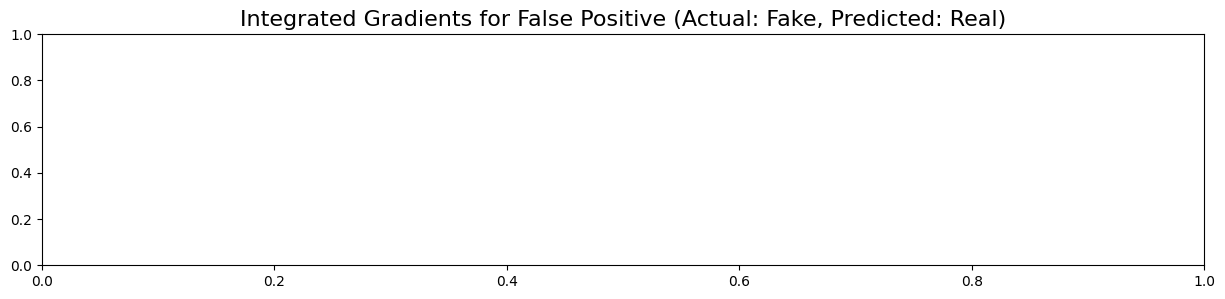

In [ ]:
import torch
import torch.nn as nn
from captum.attr import IntegratedGradients
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Custom TextTokenEmbeddings class to avoid import issues

class CustomTextTokenEmbeddings(nn.Module):
    def __init__(self, embedding_layer, embedding_dim):
        super().__init__()
        self.embedding = embedding_layer
        self.embedding_dim = embedding_dim

    def forward(self, input_ids):
        
        return self.embedding(input_ids)

# Custom visualize_text function to replace captum.attr.visualization.visualize_text
def custom_visualize_text(word_scores, words, title=""): # Simplified signature
    fig = plt.figure(figsize=(15, 3))
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize=16)

    cmap = plt.cm.RdYlGn # Red for negative, Green for positive
    norm = mcolors.TwoSlopeNorm(vmin=np.min(word_scores), vcenter=0, vmax=np.max(word_scores))

    html_output = ""
    for word, score in zip(words, word_scores):
        color = mcolors.to_hex(cmap(norm(score)))
        html_output += f"<span style='background-color: {color};'>{word}</span> "

   
    from IPython.display import HTML, display
    display(HTML(html_output))
    plt.show()

# Select a specific misclassified example (e.g., a false positive) to explain

if not false_positives.empty:
    example_to_explain_row = false_positives.iloc[0]
    error_type = "False Positive"
elif not false_negatives.empty:
    example_to_explain_row = false_negatives.iloc[0]
    error_type = "False Negative"
else:
    print("No misclassified examples found to explain.")
    example_to_explain_row = None

if example_to_explain_row is not None:
    original_idx = int(example_to_explain_row['original_index'])
    cleaned_text = example_to_explain_row['cleaned_text']
    actual_label = int(example_to_explain_row['actual_label'])

    print(f"\n--- Explainability Analysis for a {error_type} Example ---")
    print(f"Original Index: {original_idx}")
    print(f"Actual Label: {actual_label} ({'Real' if actual_label == 1 else 'Fake'})")
    print(f"Cleaned Text (excerpt): {cleaned_text[:200]}...")

    # Retrieve the numerical sequence from X_test using the original_index

    test_idx_pos = np.where(idx_test == original_idx)[0]
    if len(test_idx_pos) > 0:
        example_numerical_sequence = X_test[test_idx_pos[0]]
    else:
        print("Error: Original index not found in X_test.")
        example_to_explain_row = None

if example_to_explain_row is not None:
    # Convert the example's numerical sequence to a PyTorch tensor and move it to the device
    input_tensor = torch.tensor(example_numerical_sequence, dtype=torch.long).unsqueeze(0).to(device)

    # CustomTextTokenEmbeddings wrapper for the best_model's embedding layer
    
    text_embeddings = CustomTextTokenEmbeddings(bilstm_model.embedding, embedding_dim) 
   
    def forward_with_embeddings(embeddings_input):
        # embeddings_input = [batch_size, seq_len, embedding_dim]
        embedded = bilstm_model.dropout(embeddings_input)
        output, (hidden, cell) = bilstm_model.lstm(embedded)

        if bilstm_model.lstm.bidirectional:
            hidden = bilstm_model.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = bilstm_model.dropout(hidden[-1,:,:])
        return bilstm_model.fc(hidden)

    # Initialize IntegratedGradients with the new forward_func
    ig_embeddings = IntegratedGradients(forward_with_embeddings)

    # Calculate attributions for the original input (token IDs),
    
    input_embeddings = bilstm_model.embedding(input_tensor)

    # Define baselines for Integrated Gradients
    
    baselines = torch.zeros_like(input_embeddings)

    
    original_training_state = bilstm_model.training
    bilstm_model.train()

    # Compute the attributions
    attributions_ig, delta = ig_embeddings.attribute(input_embeddings,
                                                baselines=baselines,
                                                n_steps=50,
                                                return_convergence_delta=True,
                                                target=None) # Target=None for binary output (scalar)

    # FIX: Restore original training state
    if not original_training_state:
        bilstm_model.eval()

    # Get predictions for the example
    bilstm_model.eval()
    with torch.no_grad():
        logits = bilstm_model(input_tensor).squeeze(0)
        predicted_probability = torch.sigmoid(logits).item()
        predicted_label = 1 if predicted_probability >= 0.5 else 0

    # Map numerical sequence back to words using the vocabulary
    reverse_vocab = {v: k for k, v in vocabulary.items()}
    tokens = [reverse_vocab[idx] for idx in example_numerical_sequence if idx != 0] # Exclude PAD tokens

    # Integrated Gradients attributions for embeddings are typically summed across the embedding dimension
    attributions_ig_sum = attributions_ig.sum(dim=-1).squeeze(0) # Sum across embedding_dim and remove batch dim

    # Ensure attributions match the length of tokens
    attributions_ig_trimmed = attributions_ig_sum[:len(tokens)].cpu().detach().numpy()

    # Visualize attributions using the custom function
    print(f"\nPredicted Label: {predicted_label} ({'Real' if predicted_label == 1 else 'Fake'}) (Probability: {predicted_probability:.4f})")
    print("\nIntegrated Gradients Visualization:")
    custom_visualize_text(
        word_scores=attributions_ig_trimmed,
        words=tokens,
        title=f"Integrated Gradients for {error_type} (Actual: {'Real' if actual_label == 1 else 'Fake'}, Predicted: {'Real' if predicted_label == 1 else 'Fake'})"
    )
else:
    print("Skipping explainability analysis due to no suitable misclassified example.")